In [1]:
from scipy.stats import beta

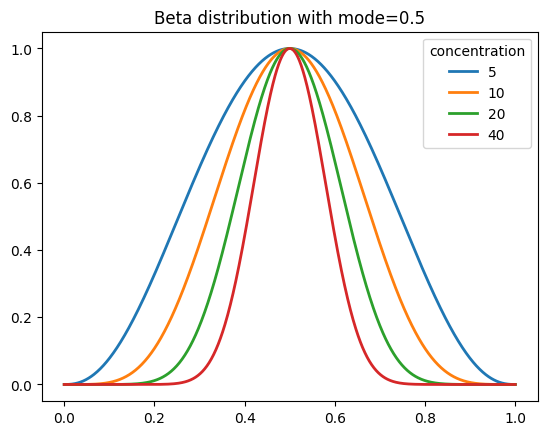

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 1000)


mode = 0.5

for conc in [5,10,20,40]:
    a = mode*conc + 1
    b = (1 - mode) * conc + 1
    rv = beta(a, b)
    y_max = rv.pdf(mode)
    ax.plot(x, rv.pdf(x)/y_max, lw=2, label=f'{conc}')

ax.set_title('Beta distribution with mode=0.5')
ax.legend(title='concentration')
plt.show()

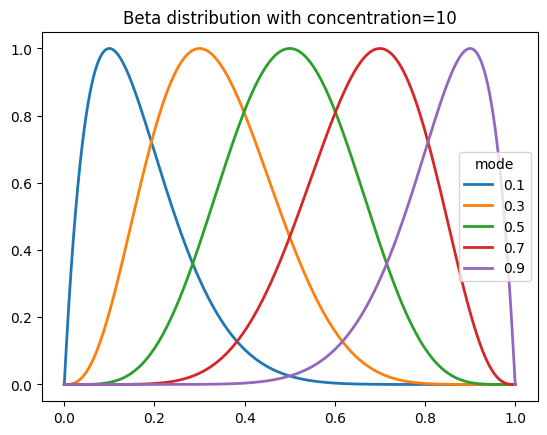

In [3]:
conc = 10

fig, ax = plt.subplots(1, 1)
for mode in [0.1,0.3,0.5,0.7,0.9]:
    a = mode*conc + 1
    b = (1 - mode) * conc + 1
    rv = beta(a, b)
    y_max = rv.pdf(mode)
    ax.plot(x, rv.pdf(x)/y_max, lw=2, label=f'{mode}')

ax.set_title('Beta distribution with concentration=10')
ax.legend(title='mode')
plt.show()

In [4]:
dates = np.arange(pd.Timestamp('2025-01-01'), pd.Timestamp('2025-05-01'), dtype='datetime64[D]')
len(dates)

120

In [5]:
date_mapping = np.linspace(0,1,len(dates))

In [6]:
len(date_mapping)

120

In [7]:
import pandas as pd

df = pd.DataFrame({'x': date_mapping, 'date': dates})
df

,x,date
0,0.000000,2025-01-01
1,0.008403,2025-01-02
2,0.016807,2025-01-03
3,0.025210,2025-01-04
4,0.033613,2025-01-05
...,...,...
115,0.966387,2025-04-26
116,0.974790,2025-04-27
117,0.983193,2025-04-28
118,0.991597,2025-04-29


In [8]:
mode = df.loc[df.date == pd.Timestamp('2025-02-01'), 'x'].item()
mode

0.26050420168067223

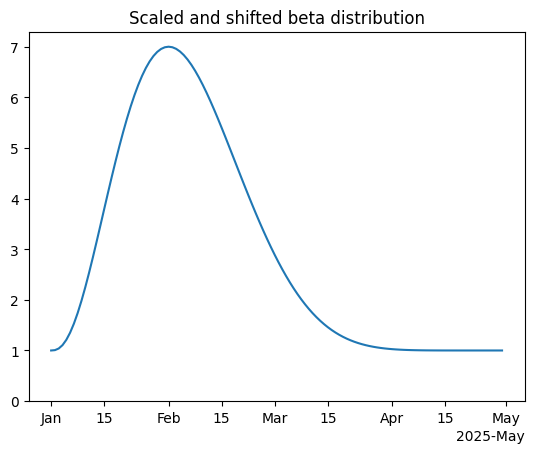

In [9]:
import matplotlib.dates as mdates

conc = 10
y_min = 1
y_max = 7
x_min = pd.Timestamp('2025-01-01')
x_max = pd.Timestamp('2025-05-01')
x_mode = pd.Timestamp('2025-02-01')

def beta_dist(x_min, x_max, x_mode, conc, y_min, y_max):
    """Scaled and shifted beta distribution, with time-based x axis."""
    assert x_min < x_mode < x_max, "Dates must comply with start < peak < end."

    dates = np.arange(x_min, x_max, dtype='datetime64[D]')
    date_mapping = np.linspace(0,1,len(dates))
    df = pd.DataFrame({'x': date_mapping, 'date': dates})
    mode = df.loc[df.date == x_mode, 'x'].item()

    a = mode*conc + 1
    b = (1 - mode) * conc + 1
    dist = beta(a, b)
    dist_max = dist.pdf(mode)

    df['y'] = dist.pdf(df.x)/dist_max * (y_max-y_min) + y_min
    return df

df = beta_dist(x_min, x_max, x_mode, conc, y_min, y_max)

fig, ax = plt.subplots(1, 1)
ax.plot(df.date, df.y, label=f'{conc}')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_title('Scaled and shifted beta distribution')
ax.set_ylim([0, None])
plt.show()

In [10]:
df

,x,date,y
0,0.000000,2025-01-01,1.000000
1,0.008403,2025-01-02,1.006842
2,0.016807,2025-01-03,1.039090
3,0.025210,2025-01-04,1.105493
4,0.033613,2025-01-05,1.209358
...,...,...,...
115,0.966387,2025-04-26,1.000000
116,0.974790,2025-04-27,1.000000
117,0.983193,2025-04-28,1.000000
118,0.991597,2025-04-29,1.000000
